# K-means Clustering

In [1]:
# Resources:
    # Nice visuals and explanation of Lloyd's algorithm
    # https://datasciencelab.wordpress.com/tag/lloyds-algorithm/

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

vehicle_df = pd.read_csv("vehicle.csv").dropna()

In [3]:
vehicle_df.shape

(813, 19)

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyration

In [5]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
# Class is categorical, use value_counts function
vehicle_df["class"].value_counts()

class
car    413
bus    205
van    195
Name: count, dtype: int64

<Axes: xlabel='class'>

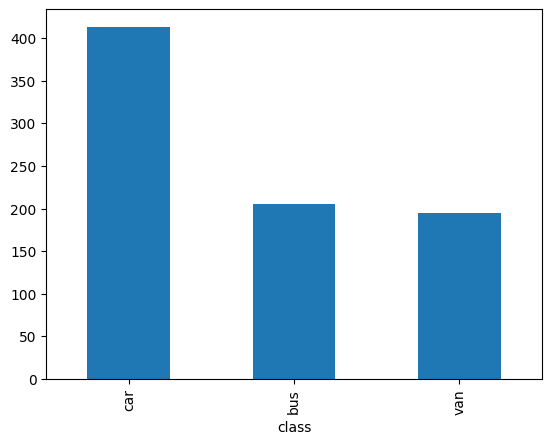

In [ ]:
vehicle_df["class"].value_counts().plot(kind="bar")

<Axes: >

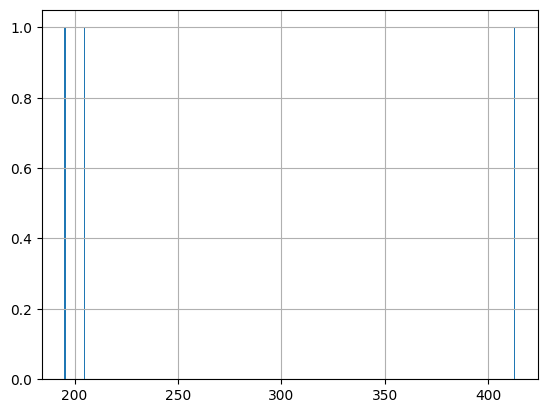

In [8]:
vehicle_df["class"].value_counts().hist(bins=300)

In [9]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
# go for any clustering methods. You can use zscore function to do this.

In [11]:
vehicle_df_1 = vehicle_df.drop("class", axis=1)

In [12]:
from scipy.stats import zscore

# Apply zscore normalization for each column
vehicle_df_1_z = vehicle_df_1.apply(zscore)

In [13]:
vehicle_df_1_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features by removing the mean and scaling to unit variance
# This does z score normalization by default so no need to use scipy zscore function
sc = StandardScaler()
X_standard = sc.fit_transform(vehicle_df_1)

In [15]:
print("Standardized Data:")
print(X_standard)

Standardized Data:
[[ 0.16323063  0.52040788  0.06066872 ...  0.37128716 -0.3218087
   0.17183708]
 [-0.32287376 -0.61912319  0.12406675 ...  0.14710858  0.00340009
   0.44231829]
 [ 1.2569655   0.84598818  1.51882349 ... -0.41333788 -0.1592043
   0.03659647]
 ...
 [ 1.5000177   1.49714879  1.20183332 ... -0.97378433 -0.3218087
   0.7127995 ]
 [-0.93050425 -1.43307395 -0.25632145 ...  1.38009078  0.16600449
  -0.09864413]
 [-1.05203035 -1.43307395 -1.01709784 ...  0.59546574 -0.4844131
  -0.77484716]]


First data point:
0.16323062523943094
0.5204078791845898

Second data point:
-0.32287376420986447
-0.6191231867790511

Scatter plot of first two features:


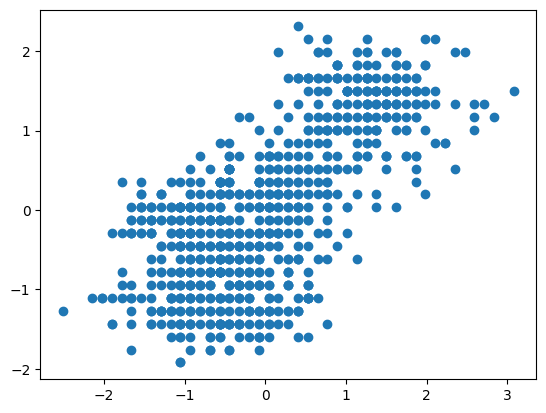

In [16]:
print("First data point:")
print(X_standard[:, 0][0])
print(X_standard[:, 1][0])

print("\nSecond data point:")
print(X_standard[:, 0][1])
print(X_standard[:, 1][1])

print("\nScatter plot of first two features:")
plt.scatter(X_standard[:,0], X_standard[:,1])
plt.show()


Text(0.5, 1.0, 'Selecting the values of k with the Elbow Method for k-means clustering')

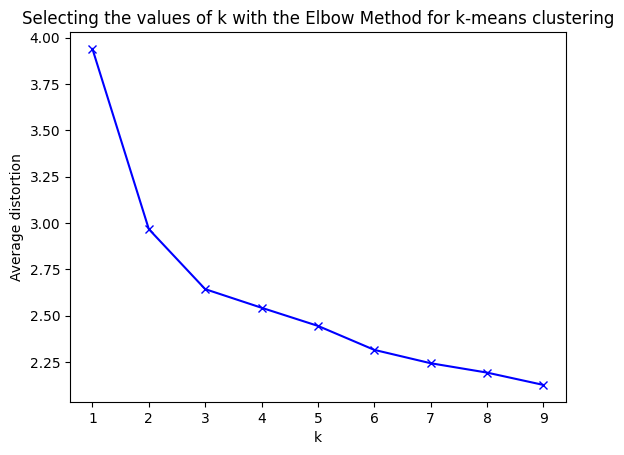

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Find optimal no. of clusters using Elbow method
clusters = range(1, 10)
mean_distortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_standard)
    prediction = model.predict(X_standard)
    mean_distortions.append(sum(np.min(cdist(X_standard, model.cluster_centers_, "euclidean"), axis=1)) / X_standard.shape[0])

plt.plot(clusters, mean_distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting the values of k with the Elbow Method for k-means clustering")


3 is the best k value

In [18]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)

In [19]:
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,15
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2345
,copy_x,True
,algorithm,'lloyd'


In [20]:
kmeans.fit(X_standard)

,n_clusters,3
,init,'k-means++'
,n_init,15
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,2345
,copy_x,True
,algorithm,'lloyd'


In [21]:
centroids = kmeans.cluster_centers_

In [22]:
centroids

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

In [23]:
# Calculate the centroids for the columns to profile 
centroid_df = pd.DataFrame(centroids, columns=list(X_standard))

In [24]:
# Creating a new Dataframe only for labels and converting it into categorical variable
dataframe_labels = pd.DataFrame(kmeans.labels_, columns=list(["labels"]))

dataframe_labels["labels"] = dataframe_labels["labels"].astype("category")

In [25]:
dataframe_labels

,labels
0,2
1,2
2,0
3,2
4,1
...,...
808,2
809,2
810,0
811,2


In [26]:
dataframe_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   labels  813 non-null    category
dtypes: category(1)
memory usage: 1.0 KB


In [27]:
# Joining the label dataframe with the data, dataframe.
dataframe_labeled = vehicle_df_1.join(dataframe_labels)

In [28]:
dataframe_labeled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,labels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1


In [29]:
dataframe_analysis = dataframe_labeled.groupby("labels", observed=True).head(1234)
dataframe_analysis

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,labels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,83,46.0,68.0,139.0,59.0,6,150.0,44.0,19.0,146,172.0,336.0,183.0,74.0,5.0,3.0,185.0,191,2
809,79,38.0,55.0,120.0,55.0,5,142.0,48.0,19.0,128,153.0,295.0,145.0,81.0,4.0,2.0,180.0,183,2
810,97,55.0,103.0,197.0,63.0,11,215.0,31.0,24.0,172,219.0,677.0,219.0,75.0,5.0,24.0,185.0,194,0
811,83,39.0,69.0,127.0,54.0,5,135.0,49.0,18.0,131,155.0,274.0,162.0,69.0,16.0,6.0,187.0,190,2


In [30]:
dataframe_labeled["labels"].value_counts()

labels
2    297
0    251
1    232
Name: count, dtype: int64

In [31]:
# Show the cluster centers of the standardized data
print(vehicle_df_1_z.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014            

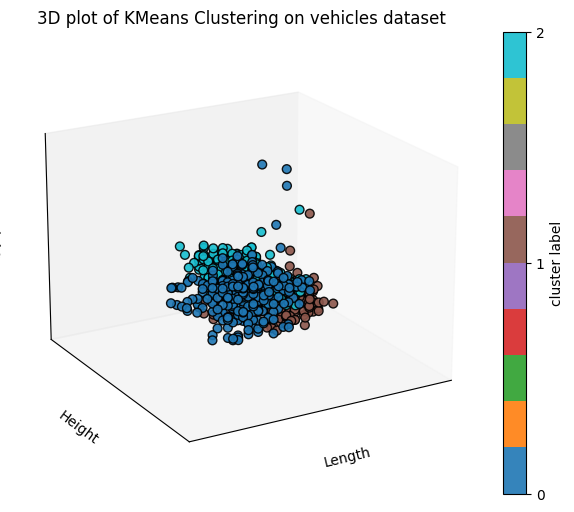

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# create figure and 3D axes (modern approach)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# (optional) set viewing angle
ax.view_init(elev=20, azim=60)

# Fit KMeans on the standardized / z-scored dataframe if that's intended
# (Make sure vehicle_df_1_z is numeric and columns are in expected order.)
kmeans.fit(vehicle_df_1_z)   # or kmeans.fit(X_standard) if you prefer
labels = kmeans.labels_

# Use numpy arrays for clarity; choose columns intentionally (0,1,3 here)
x = vehicle_df_1_z.iloc[:, 0].values
y = vehicle_df_1_z.iloc[:, 1].values
z = vehicle_df_1_z.iloc[:, 3].values

# scatter: color by label, set marker and edgecolor (matplotlib may warn for unfilled markers)
sc = ax.scatter(x, y, z, c=labels.astype(float), cmap="tab10", edgecolor="k", s=40, alpha=0.9)

# hide ticks if you want a cleaner plot
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# set axis labels and title
ax.set_xlabel("Length")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")
ax.set_title("3D plot of KMeans Clustering on vehicles dataset")

# (optional) add colorbar keyed to labels
plt.colorbar(sc, ticks=range(len(np.unique(labels))), label="cluster label")

plt.show()

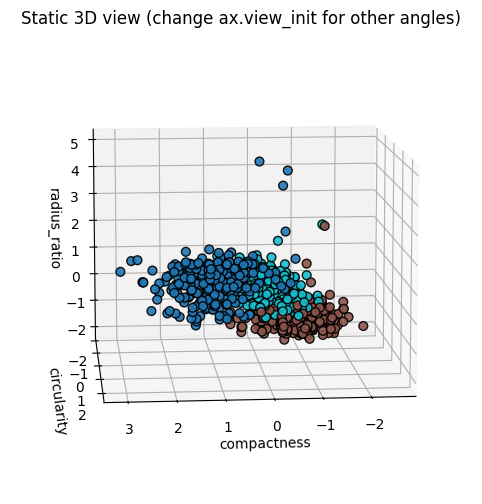

In [43]:
# 3D clustering plot with rotation options: 'static', 'animated', 'plotly'
MODE = 'static'   # change to 'static', 'animated', or 'plotly' as desired
# MODE = 'animated'
# MODE = 'plotly'

import numpy as np
import matplotlib.pyplot as plt

# Choose columns: prefer names if present, else use indices 0,1,3
def get_xyz_from_df():
    try:
        df = vehicle_df_1_z  # expected pandas DataFrame from earlier cells
        x = df.iloc[:, 0].values
        y = df.iloc[:, 1].values
        z = df.iloc[:, 3].values
        x_label = df.columns[0]
        y_label = df.columns[1]
        z_label = df.columns[3] if len(df.columns) > 3 else df.columns[-1]
        return x, y, z, x_label, y_label, z_label
    except Exception:
        # fallback to X_standard (numpy array) if DataFrame not available
        try:
            x = X_standard[:, 0]
            y = X_standard[:, 1]
            z = X_standard[:, 3]
            return x, y, z, 'feat_0', 'feat_1', 'feat_3'
        except Exception:
            raise RuntimeError("Couldn't find vehicle_df_1_z or X_standard in the notebook namespace.")

x, y, z, x_label, y_label, z_label = get_xyz_from_df()

# Ensure kmeans labels exist (fit if necessary)
labels = getattr(kmeans, "labels_", None)
if labels is None:
    try:
        kmeans.fit(vehicle_df_1_z if 'vehicle_df_1_z' in globals() else X_standard)
        labels = kmeans.labels_
    except Exception as e:
        raise RuntimeError("kmeans not fitted and automatic fit failed: " + str(e))

# create 3D scatter helper
def make_3d_scatter():
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(x, y, z, c=labels.astype(int), cmap='tab10', edgecolor='k', s=40, alpha=0.9)
    ax.set_xlabel(x_label); ax.set_ylabel(y_label); ax.set_zlabel(z_label)
    return fig, ax, sc

if MODE == 'static':
    fig, ax, sc = make_3d_scatter()
    # ax.view_init(elev=20, azim=60)  # set desired static angle
    ax.view_init(elev=10, azim=85)  # set desired static angle
    plt.title('Static 3D view (change ax.view_init for other angles)')
    plt.show()

elif MODE == 'animated':
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML

    fig, ax, sc = make_3d_scatter()
    def update(frame):
        ax.view_init(elev=20, azim=frame)
        return sc,

    anim = FuncAnimation(fig, update, frames=np.linspace(0, 360, 180), interval=50, blit=False)
    # Display inline (works in many Jupyter frontends)
    display(HTML(anim.to_jshtml()))

    # Optionally save:
    # anim.save('rotation.mp4', writer='ffmpeg', dpi=150)

elif MODE == 'plotly':
    try:
        import plotly.express as px
        import pandas as pd
    except Exception:
        raise RuntimeError("Plotly not installed. Install with: pip install plotly")

    # build DataFrame for Plotly
    if 'vehicle_df_1_z' in globals():
        df_plot = vehicle_df_1_z.copy()
    else:
        df_plot = pd.DataFrame(np.column_stack((x, y, z)), columns=[x_label, y_label, z_label])
    df_plot['label'] = labels.astype(int)
    fig = px.scatter_3d(df_plot, x=x_label, y=y_label, z=z_label, color='label', height=700, opacity=0.8)
    fig.update_layout(title='3D clusters (Plotly)')
    fig.show()

else:
    raise ValueError("Unknown MODE. Set MODE to 'static', 'animated', or 'plotly'.")

Explained variance ratio (PC1..PC3): [0.52454218 0.16588564 0.10640714]


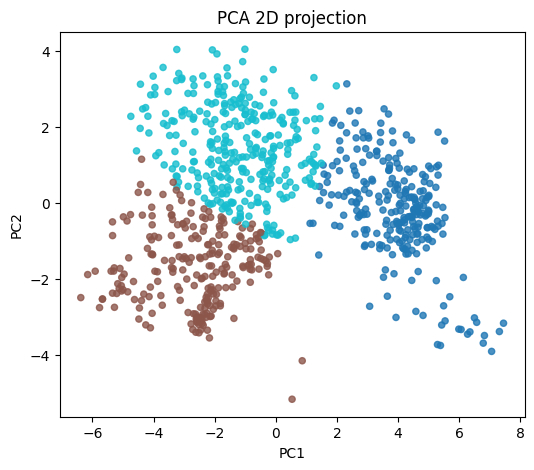

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# use vehicle_df_1_z (DataFrame) or X_standard (numpy) from your notebook
X = vehicle_df_1_z.values if 'vehicle_df_1_z' in globals() else X_standard

pca = PCA(n_components=3, random_state=0)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (PC1..PC3):", pca.explained_variance_ratio_)

# 2D quick plot
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='tab10', s=20, alpha=0.8)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA 2D projection')
plt.show()

## Comparing 3D KMeans vs PCA 2D

- **Purpose:** Compare what you actually see — raw feature geometry (3D plot) vs a compressed summary of the whole dataset (PCA 2D).

- **3D KMeans plot:**
  - **What it is:** points shown on three original standardized features (no dimensionality reduction).
  - **Intuition:** you’re seeing true relationships for those three features only — distances and shapes are meaningful for those axes.

- **PCA 2D projection:**
  - **What it is:** points projected onto the two directions (PC1, PC2) that capture the most variance across all features.
  - **Intuition:** each axis is a combination of many original features; PCA shows the main directions of variation in the whole 18‑D space.

- **How to read differences (simple):**
  - If clusters look separated in the 3D raw‑feature plot but overlap in PCA: the separation depends on those particular features and is not a dominant direction of overall variance (check PC3 or original features).
  - If PCA shows clear separation but the 3D raw plot does not: the separation comes from a combination of many features (PCA found the useful directions), so the three chosen features don’t capture it.

- **Quick, actionable checks:**
  - **Variance check:** print `pca.explained_variance_ratio_` to see how much PC1+PC2 capture.
  - **3D PCA:** plot `X_pca[:, :3]` to see whether PC3 helps separate clusters.
  - **Quantify:** compute `silhouette_score(X, kmeans.labels_)` for an objective measure of separation.
  - **Be explicit:** print which columns you plotted and label the 3D axes with their real names so you know what you’re looking at.

Short takeaway: the 3D plot shows "what these three features say"; the PCA plot shows "what the strongest combined signals across all features say." Use PCA (or silhouette scores) when you want a view that reflects the full 18‑D structure.

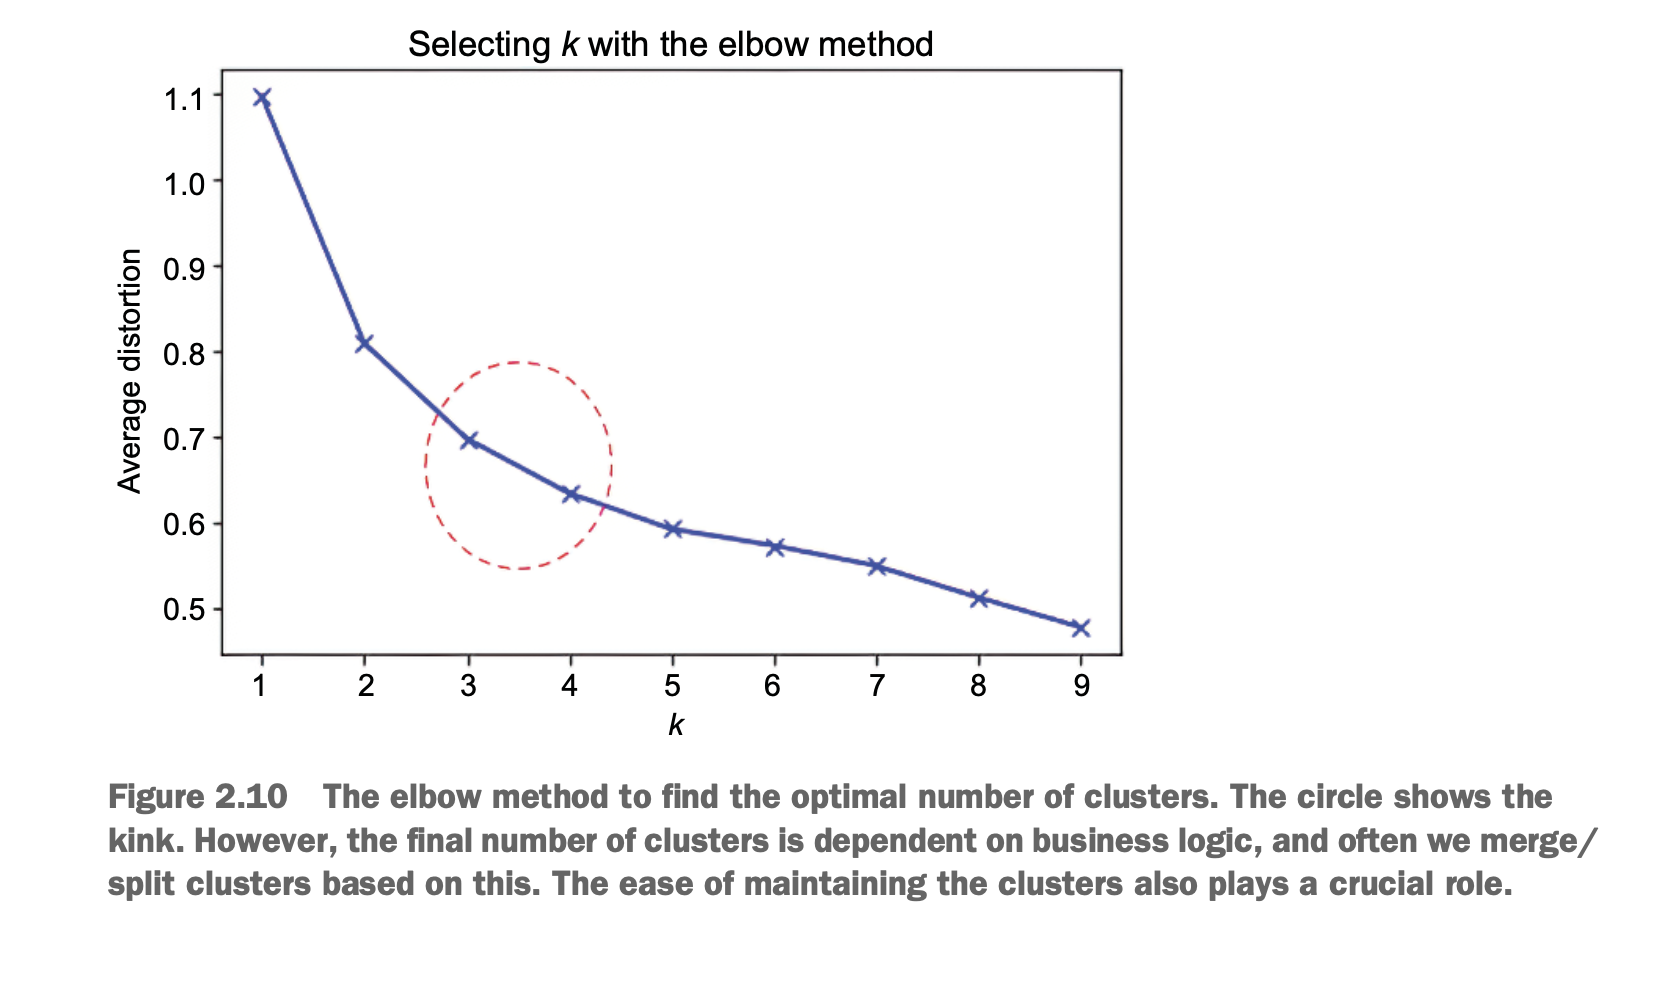

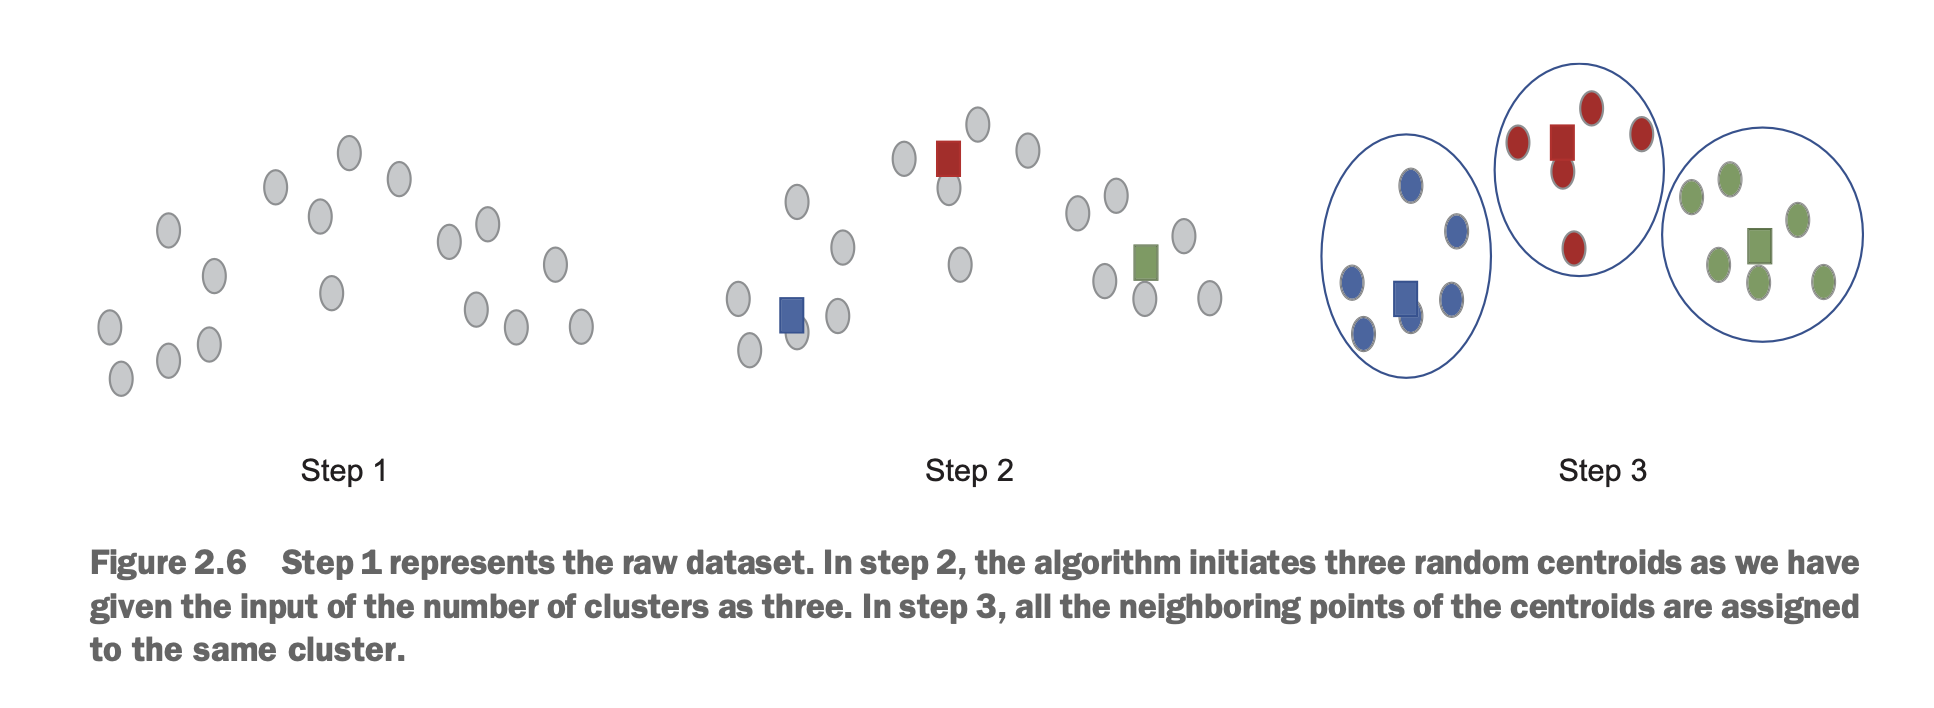

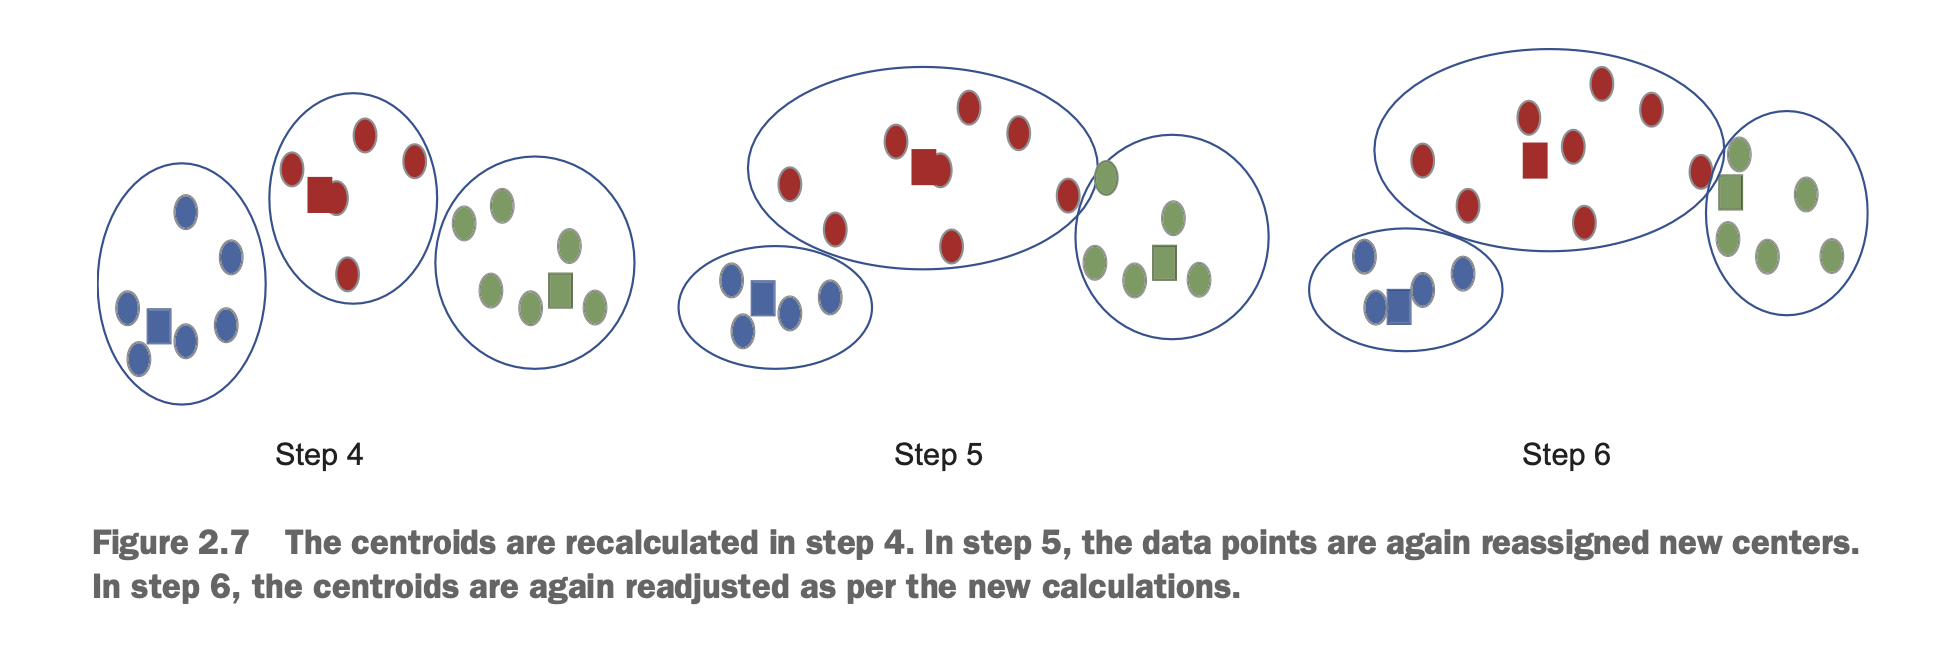